In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import pylab; 
import os; 
import pandas as pd
import plotly.plotly as py;
import plotly.tools as tls
from statsmodels import robust

In [2]:
# Read in data
def parse_data_CDC(file, cancer_type, metric_index):
    
    filename = os.path.join("Data", file)
    
    data = []; cancer=[];metric=[];year=[];
    all_races=[]; caucasian=[];african_american=[];asian=[];hispanic=[];native_american=[];
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7,x8,x9 = data[i].split(",")  
        
        if x1 == cancer_type:
            if x2 == metric_index:
                year.append(int(x3)) 
                all_races.append(int(x4))
                
                year_sum = int(x5)+int(x6)+int(x7)+int(x8)+int(x9)
                
                caucasian.append(int(x5)/year_sum)
                african_american.append(int(x6)/year_sum)
                asian.append(int(x7)/year_sum) 
                hispanic.append(int(x8)/year_sum) 
                native_american.append(int(x9)/year_sum) 
    
    return(year, caucasian, african_american, asian, hispanic, native_american)

In [3]:
def stacked_bar_CDC(title, source_filename, cancer_type, measurement_type):
    
    year=[]; caucasian=[]; african_american=[]; asian=[]; hispanic=[]; native_american=[];
    year, caucasian, african_american, asian, hispanic, native_american = parse_data_CDC(source_filename, cancer_type, measurement_type)

    plt.bar(year,caucasian, color=[.9, .7, .7], width=1)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i]
        bar_offset.append(number)

    plt.bar(year,african_american, color=[.7, .9, .7], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i]
        bar_offset.append(number)

    plt.bar(year, asian, color=[.7, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i]
        bar_offset.append(number)

    plt.bar(year, hispanic, color=[.9, .7, .9], width=1, bottom=bar_offset)

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i] + hispanic[i]
        bar_offset.append(number)

    plt.bar(year, native_american, color=[.9, .9, .7], width=1, bottom=bar_offset)
    
    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Volume Fraction'); 
    plt.ylim((.7,1.01))

    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()
    

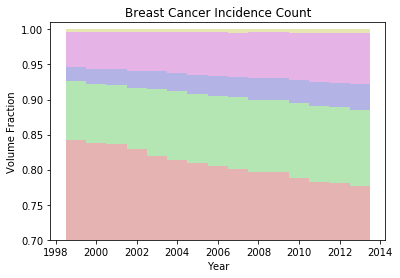

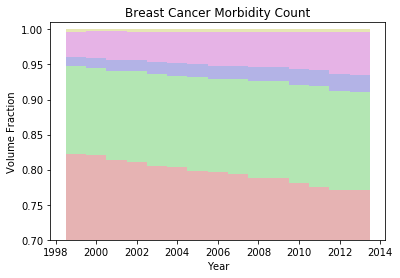

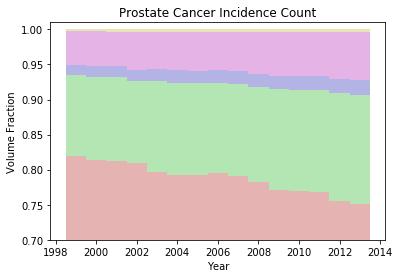

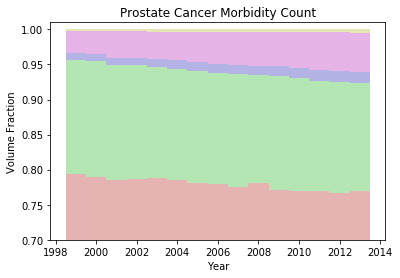

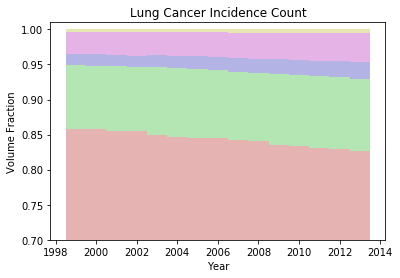

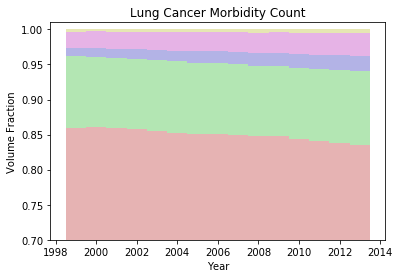

In [4]:

stacked_bar_CDC("Breast Cancer Incidence Count", "v01_CDC.csv","2","3")
stacked_bar_CDC("Breast Cancer Morbidity Count", "v01_CDC.csv","2","4")

stacked_bar_CDC("Prostate Cancer Incidence Count", "v01_CDC.csv","3","3")
stacked_bar_CDC("Prostate Cancer Morbidity Count", "v01_CDC.csv","3","4")

stacked_bar_CDC("Lung Cancer Incidence Count", "v01_CDC.csv","4","3")
stacked_bar_CDC("Lung Cancer Morbidity Count", "v01_CDC.csv","4","4")


In [5]:
def parse_data_count(file, cancer_type, year_min, year_max):
    
    filename = os.path.join("Data", file)
     
    data = []  
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = []; year_unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; 
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        count_caucasian
        
        if x3 == cancer_type: 
            
            x2 = int(x2)
            x4 = int(x4)
            x5 = int(x5)
            
            if x2 == 6:
                unknown.append(x5)
                year_unknown.append(x4)
                count_unknown = count_unknown + x5
                
            if x2 == 5:
                caucasian.append(x5)
                year_caucasian.append(x4)
                count_caucasian = count_caucasian + x5
        
            if x2 == 2:
                african_american.append(x5)
                year_african_american.append(int(x4))
                count_african_american = count_african_american + x5
            
            if x2 == 1:
                asian.append(x5)
                year_asian.append(x4)
                count_asian = count_asian + x5
             
            if x2 == 3:
                hispanic.append(x5)
                year_hispanic.append(x4)
                count_hispanic = count_hispanic + x5
                         
            if x2 == 4:
                native_american.append(x5)
                year_native_american.append(x4) 
                count_native_american = count_native_american + x5
                
    print("Caucasian Counts = ", count_caucasian)
    print("African American Counts = ", count_african_american)
    print("Asian Counts = ", count_asian)
    print("Hispanic Counts = ", count_hispanic)
    print("Native American Counts = ", count_native_american)
    print("Unknown Counts = ", count_unknown)
    print("Total = ", count_caucasian + count_african_american + count_asian + count_hispanic + count_native_american)

    return(caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
           hispanic, year_hispanic, native_american, year_native_american)


In [6]:
def parse_counts(source_filename, cancer_type, year_min, year_max, title):

    caucasian, year_caucasian, african_american, year_african_american, asian, year_asian, \
    hispanic, year_hispanic, native_american, year_native_american \
    = parse_data_count(source_filename, cancer_type, year_min, year_max)

    plt.bar(year_caucasian, caucasian, color=[.9, .7, .7], width=.8, label = 'Caucasian')
    plt.bar(year_african_american, african_american, color=[.7, .9, .7], width=.7, label = 'Caucasian')
    plt.bar(year_asian, asian, color=[.7, .7, .9], width=.6, label = 'Caucasian')
    plt.bar(year_hispanic, hispanic, color=[.9, .7, .9], width=.5, label = 'Caucasian')
    plt.bar(year_native_american, native_american, color=[.9, .7, .9], width=.4, label = 'Caucasian')

    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Volume Fraction'); 
    plt.xlim((year_min, year_max));
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()


Caucasian Counts =  34196
African American Counts =  10482
Asian Counts =  5407
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  135733
Total =  50085


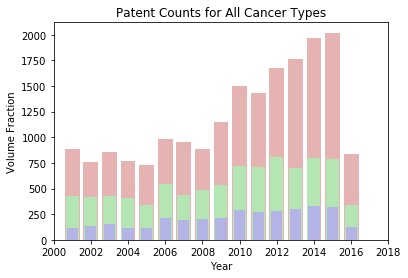

Caucasian Counts =  37998
African American Counts =  14579
Asian Counts =  5146
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  75051
Total =  57723


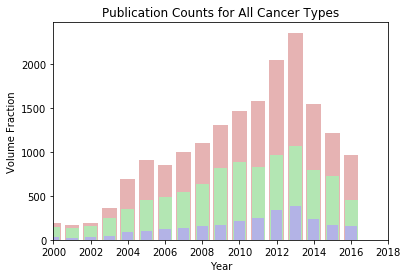

Caucasian Counts =  10320
African American Counts =  749
Asian Counts =  73
Hispanic Counts =  8
Native American Counts =  0
Unknown Counts =  1818
Total =  11150


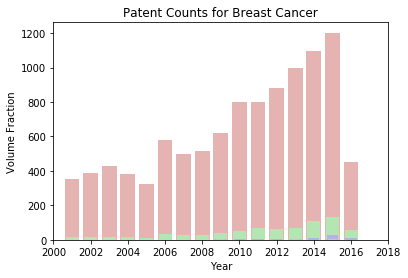

Caucasian Counts =  14950
African American Counts =  959
Asian Counts =  110
Hispanic Counts =  24
Native American Counts =  0
Unknown Counts =  2002
Total =  16043


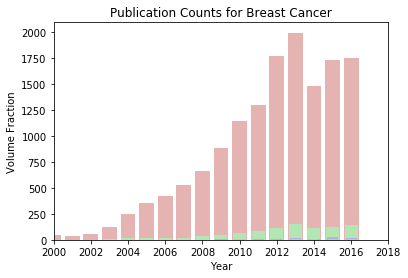

Caucasian Counts =  3569
African American Counts =  6
Asian Counts =  27
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  145
Total =  3602


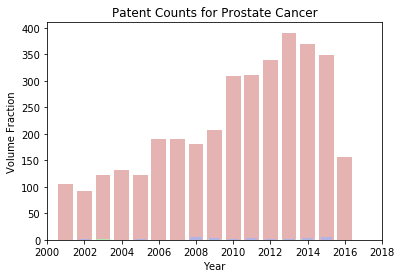

Caucasian Counts =  2488
African American Counts =  11
Asian Counts =  71
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  310
Total =  2570


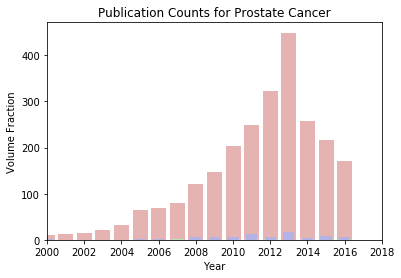

Caucasian Counts =  6949
African American Counts =  139
Asian Counts =  410
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  15821
Total =  7498


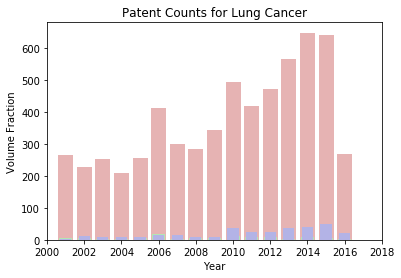

Caucasian Counts =  9235
African American Counts =  130
Asian Counts =  452
Hispanic Counts =  0
Native American Counts =  0
Unknown Counts =  19313
Total =  9817


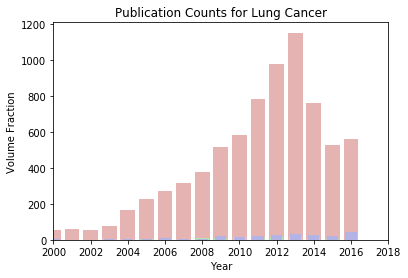

In [7]:
parse_counts("v01_PaCo.csv", "1", 2000, 2018, "Patent Counts for All Cancer Types")
parse_counts("v01_PuCo.csv", "1", 2000, 2018, "Publication Counts for All Cancer Types")
parse_counts("v01_PaCo.csv", "2", 2000, 2018, "Patent Counts for Breast Cancer")
parse_counts("v01_PuCo.csv", "2", 2000, 2018, "Publication Counts for Breast Cancer")
parse_counts("v01_PaCo.csv", "3", 2000, 2018, "Patent Counts for Prostate Cancer")
parse_counts("v01_PuCo.csv", "3", 2000, 2018, "Publication Counts for Prostate Cancer")
parse_counts("v01_PaCo.csv", "4", 2000, 2018, "Patent Counts for Lung Cancer")
parse_counts("v01_PuCo.csv", "4", 2000, 2018, "Publication Counts for Lung Cancer")


In [8]:
def parse_data_count(source_filename, cancer_type, unknown_included):
    
    filename = os.path.join("Data", source_filename)
     
    data = []  
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    year_caucasian = []; year_african_american = []; year_asian = []; year_hispanic = []; year_native_american = []; year_unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; count_all = 0; 
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()  
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7 = data[i].split(",") 
        
        if x4 == '0':
            if cancer_type == "all":
                x1 = cancer_type
            
            if x1 == cancer_type: 
                
                if unknown_included == 'yes':
                    if x3 == '6':
                        count_unknown = count_unknown + 1
                        count_all = count_all+1
                
                if x3 == '5':
                    count_caucasian = count_caucasian + 1
                    count_all = count_all+1
        
                if x3 == '2':
                    count_african_american = count_african_american + 1
                    count_all = count_all+1
            
                if x3 == '1':
                    count_asian = count_asian + 1
                    count_all = count_all+1
             
                if x3 == '3':
                    count_hispanic = count_hispanic + 1
                    count_all = count_all+1
                         
                if x3 == '4':
                    count_native_american = count_native_american + 1
                    count_all = count_all+1
    
    total = [count_asian, count_african_american, count_hispanic, count_native_american, count_caucasian, count_unknown]
    total_percentages = [count_asian/count_all, count_african_american/count_all, count_hispanic/count_all, count_native_american/count_all, count_caucasian/count_all, count_unknown/count_all ]
    
    print(" ")
    print("Caucasian Counts = ", count_caucasian, '   ', round(count_caucasian/count_all,2))
    print("African American Counts = ", count_african_american, '   ', round(count_african_american/count_all,2))
    print("Asian Counts = ", count_asian, '   ', round(count_asian/count_all,2))
    print("Hispanic Counts = ", count_hispanic, '   ', round(count_hispanic/count_all,2))
    print("Native American Counts = ", count_native_american, '   ', round(count_native_american/count_all,2))
    print("Unknown Counts = ", count_unknown, '   ', round(count_unknown/count_all,2))
    print("Total = ", count_all,'(without unknowns:', count_all-count_unknown, ')')
    
    return(total, total_percentages)   


In [9]:
def parse_cell_line_counts(source_filename, cancer_type, year_min, year_max, title):
    
    ethnicity_list = ["Asian","African American","Hispanic","Native American", "Caucasian","Unknown"]
    
    fig = plt.figure(2, figsize=(18, 10)); 
    
    plot_number = 221;
    ax = fig.add_subplot(plot_number);
    total, total_percentages = parse_data_count(source_filename, cancer_type, 'yes')
    plt.bar(ethnicity_list,total)
    plt.title(title)
    plt.ylabel('Number of Cell Lines'); 
    
    plot_number = 222;
    ax = fig.add_subplot(plot_number);
    total, total_percentages = parse_data_count(source_filename, cancer_type, 'no')
    plt.bar(ethnicity_list[0:5],total[0:5])
    plt.title(title)
    plt.ylabel('Number of Cell Lines'); 
    
    saved_filename = os.path.join("Figures", title +'.jpg')
    plt.savefig(saved_filename, bbox_inches='tight')
    plt.show()

 
Caucasian Counts =  51     0.33
African American Counts =  17     0.11
Asian Counts =  4     0.03
Hispanic Counts =  4     0.03
Native American Counts =  0     0.0
Unknown Counts =  78     0.51
Total =  154 (without unknowns: 76 )
 
Caucasian Counts =  51     0.67
African American Counts =  17     0.22
Asian Counts =  4     0.05
Hispanic Counts =  4     0.05
Native American Counts =  0     0.0
Unknown Counts =  0     0.0
Total =  76 (without unknowns: 76 )


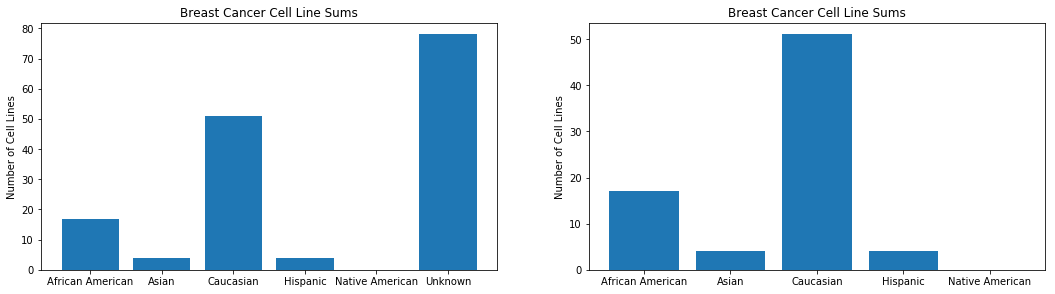

 
Caucasian Counts =  11     0.61
African American Counts =  1     0.06
Asian Counts =  1     0.06
Hispanic Counts =  0     0.0
Native American Counts =  0     0.0
Unknown Counts =  5     0.28
Total =  18 (without unknowns: 13 )
 
Caucasian Counts =  11     0.85
African American Counts =  1     0.08
Asian Counts =  1     0.08
Hispanic Counts =  0     0.0
Native American Counts =  0     0.0
Unknown Counts =  0     0.0
Total =  13 (without unknowns: 13 )


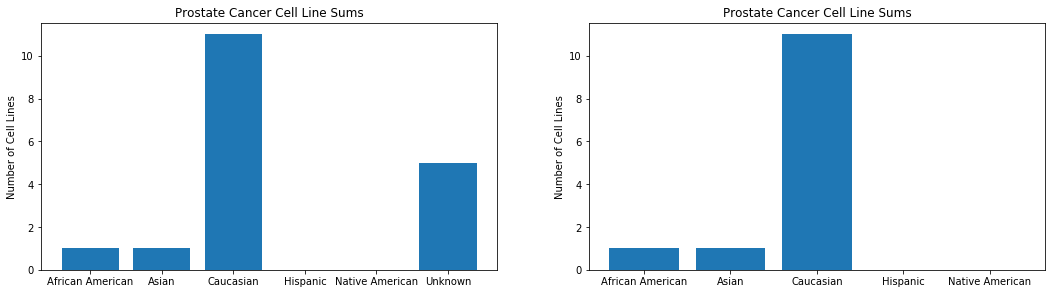

 
Caucasian Counts =  188     0.38
African American Counts =  30     0.06
Asian Counts =  46     0.09
Hispanic Counts =  0     0.0
Native American Counts =  0     0.0
Unknown Counts =  234     0.47
Total =  498 (without unknowns: 264 )
 
Caucasian Counts =  188     0.71
African American Counts =  30     0.11
Asian Counts =  46     0.17
Hispanic Counts =  0     0.0
Native American Counts =  0     0.0
Unknown Counts =  0     0.0
Total =  264 (without unknowns: 264 )


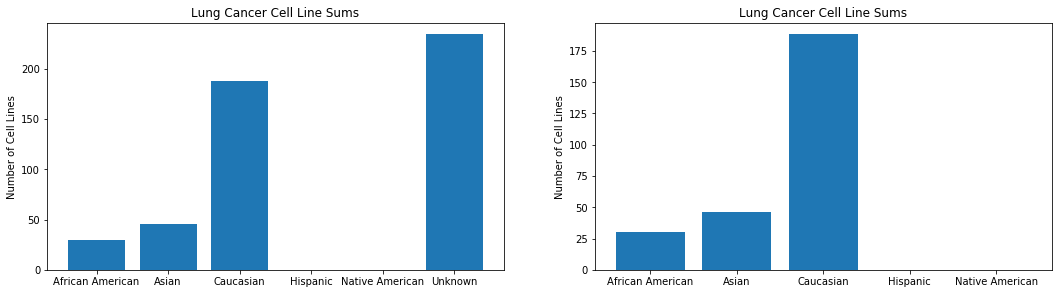

 
Caucasian Counts =  760     0.24
African American Counts =  146     0.05
Asian Counts =  488     0.15
Hispanic Counts =  7     0.0
Native American Counts =  1     0.0
Unknown Counts =  1790     0.56
Total =  3192 (without unknowns: 1402 )
 
Caucasian Counts =  760     0.54
African American Counts =  146     0.1
Asian Counts =  488     0.35
Hispanic Counts =  7     0.0
Native American Counts =  1     0.0
Unknown Counts =  0     0.0
Total =  1402 (without unknowns: 1402 )


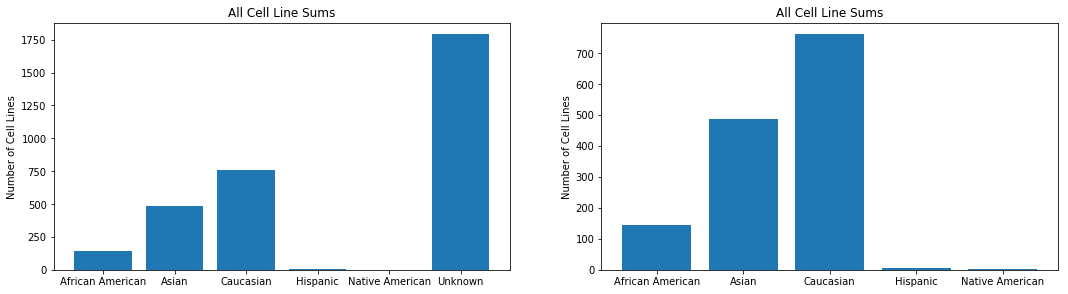

In [10]:
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", '2', 2001, 2018, 'Breast Cancer Cell Line Sums')
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", '3', 2001, 2018, 'Prostate Cancer Cell Line Sums')
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", '4', 2001, 2018, 'Lung Cancer Cell Line Sums')
parse_cell_line_counts("v01_CellLineSum_withoutLabels.csv", 'all', 2001, 2018, 'All Cell Line Sums')


In [11]:
def parse_data_CDC_averaged(source_filename, cancer_type, metric_index, year_min, year_max):
    
    filename = os.path.join("Data", source_filename)
    
    data = []; year = [];
    all_races=[]; caucasian=[];african_american=[];asian=[];hispanic=[];native_american=[];
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7,x8,x9 = data[i].split(",")  
        
        if x1 == cancer_type:
            if x2 == metric_index:
                x3 = int(x3); x4 = int(x4); x5 = int(x5); x6 = int(x6); 
                x7 = int(x7); x8 = int(x8); x9 = int(x9);
                
                if (x3 >= year_min and x3 <= year_max): 
                    all_races.append(int(x4))
                    caucasian.append(int(x5))
                    african_american.append(int(x6))
                    asian.append(int(x7))
                    hispanic.append(int(x8))
                    native_american.append(int(x9))
    
    sums = [sum(caucasian), sum(african_american), sum(asian), sum(hispanic), sum(native_american)]
    total = sum(sums)
    
    for i in range(len(sums)):
        sums[i] = sums[i]/total
    return(sums)


In [12]:
def parse_data_articles_averaged(source_filename, cancer_type, year_min, year_max):
    
    filename = os.path.join("Data", source_filename)
    
    data = []; 
    caucasian=0;african_american=0;asian=0;hispanic=0;native_american=0;
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",")  
        
        if x3 == cancer_type:
                x2 = int(x2); x4 = int(x4); x5 = int(x5); 
                
                if (x4 >= year_min and x4 <= year_max): 
                    
                    if x2 == 1:
                        asian = asian+x5
                        
                    if x2 == 2:
                        african_american = african_american+x5
                    
                    if x2 == 3:
                        hispancic = hispanic+x5
                    
                    if x2 == 4:
                        native_american = native_american+x5
                                            
                    if x2 == 5:
                        caucasian = caucasian+x5
                    
                    
    sums = [caucasian, african_american, asian, hispanic, native_american]
    total = sum(sums)
    
    for i in range(len(sums)):
        sums[i] = sums[i]/total
    return(sums)

In [13]:
def calculate_bar_offset(listoflists):

    bar_offset = []
    for i in range(len(native_american)):
        number = caucasian[i] + african_american[i] + asian[i]
        bar_offset.append(number)
        
    return(bar_offset)
    

In [14]:
def compare_cdc_to_articles(cancer_type,title):
    ethnicity_list = ["Caucasian","African American","Asian","Hispanic","Native American", "Unknown"]
    
    # Specify the years to be studied 
    year_min = 2001; year_gap = 4;
    
    # Specify the figure
    box_size = 4; fig = plt.figure(1.5, figsize=(4*box_size, 1*box_size)); plot_number = 130;
        
    # Loop through all years
    while year_min + year_gap <= 2015:
            
        # Retrieve data between years from csv files
        CDC_incidence = parse_data_CDC_averaged("v01_CDC.csv", cancer_type, '3', year_min, year_min+year_gap)
        CDC_morbidity = parse_data_CDC_averaged("v01_CDC.csv", cancer_type, '4', year_min,  year_min+year_gap)
        publication_count = parse_data_articles_averaged('v01_PuCo.csv', cancer_type, year_min,  year_min+year_gap)
        patent_count = parse_data_articles_averaged('v01_PaCo.csv', cancer_type, year_min,  year_min+year_gap)

        # Move data into lists based on ethnicitiy
        i=0; caucasian=[CDC_incidence[i], CDC_morbidity[i], publication_count[i], patent_count[i] ]; 
        i=i+1; african_american=[CDC_incidence[i], CDC_morbidity[i], publication_count[i], patent_count[i] ]; 
        i=i+1; asian=[CDC_incidence[i], CDC_morbidity[i], publication_count[i], patent_count[i] ];  
        i=i+1; hispanic=[CDC_incidence[i], CDC_morbidity[i], publication_count[i], patent_count[i] ];  
        i=i+1; native_american=[CDC_incidence[i], CDC_morbidity[i], publication_count[i], patent_count[i] ]; 
    
        # Specify parameters of the bar graph
        labels = ["Incidence","Morbidity","Publications","Patents"];
        bar_width = 0.9; 
    
        # Set up subplot and begin making bar graph 
        plot_number = plot_number+1;
        ax = fig.add_subplot(plot_number);
        plt.bar(labels,caucasian, color=[.9, .8, .8], width=bar_width)
    
        bar_offset = []
        for i in range(len(native_american)):
            number = caucasian[i]
            bar_offset.append(number)
    
        plt.bar(labels, african_american, color=[.8, .9, .8], width=bar_width, bottom=bar_offset)
    
        bar_offset = []
        for i in range(len(native_american)):
            number = caucasian[i]+african_american[i]
            bar_offset.append(number)
    
        plt.bar(labels, asian, color=[.8, .8, .9], width=bar_width, bottom=bar_offset)
    
        bar_offset = []
        for i in range(len(native_american)):
            number = caucasian[i]+african_american[i]+asian[i]
            bar_offset.append(number)
    
        plt.bar(labels, hispanic, color=[.9, .8, .9], width=bar_width, bottom=bar_offset)
    
        bar_offset = []
        for i in range(len(native_american)):
            number = caucasian[i]+african_american[i]+asian[i]+hispanic[i]
            bar_offset.append(number)
    
        plt.bar(labels, native_american, color=[.8, .9, .9], width=bar_width, bottom=bar_offset)
    
        
        ethnicities = ["Caucasian","African American", "Asian","Hispanic","Native American"]
        year_max = year_min+year_gap;
        
        plt.ylim((.7,1.01))
        plt.title(title + " Years: "+ str(year_min) + '-' + str(year_max))
        plt.ylabel('Demographic Representation');
        
        if (year_min+2*year_gap > 2015):
            plt.legend(ethnicities,loc='lower right')
        
        year_min = year_min+year_gap+1;
        
    # Once all subplots are made, save and show the figure
    saved_filename = os.path.join("Figures", title +'.jpg')
    plt.savefig(saved_filename, bbox_inches='tight')  
    plt.show()
        
        


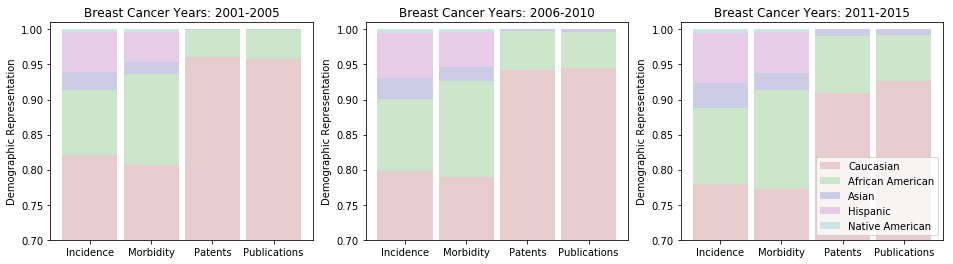

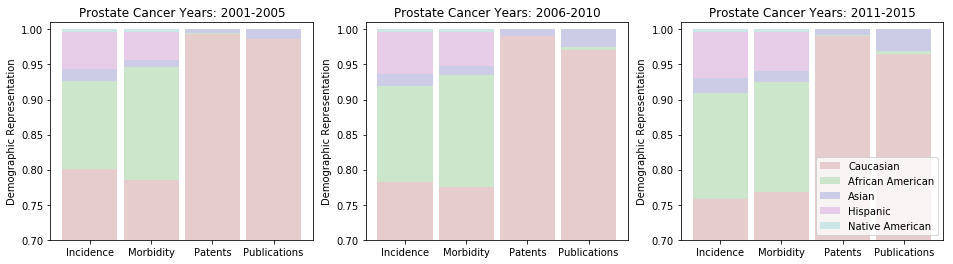

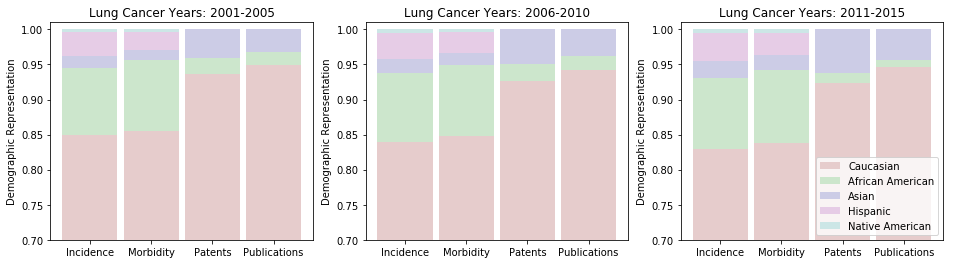

In [15]:
compare_cdc_to_articles('2',"Breast Cancer")
compare_cdc_to_articles('3',"Prostate Cancer")
compare_cdc_to_articles('4',"Lung Cancer")

 
Female Counts =  111     0.72
Male Counts =  2     0.01
Unknown Counts =  41     0.27
Total =  154 (without unknowns: 113 )
 
Female Counts =  111     0.98
Male Counts =  2     0.02
Unknown Counts =  0     0.0
Total =  113 (without unknowns: 113 )


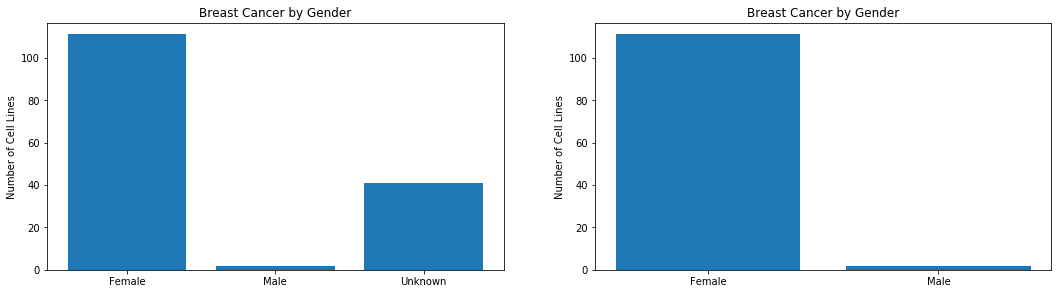

 
Female Counts =  0     0.0
Male Counts =  15     0.83
Unknown Counts =  3     0.17
Total =  18 (without unknowns: 15 )
 
Female Counts =  0     0.0
Male Counts =  15     1.0
Unknown Counts =  0     0.0
Total =  15 (without unknowns: 15 )


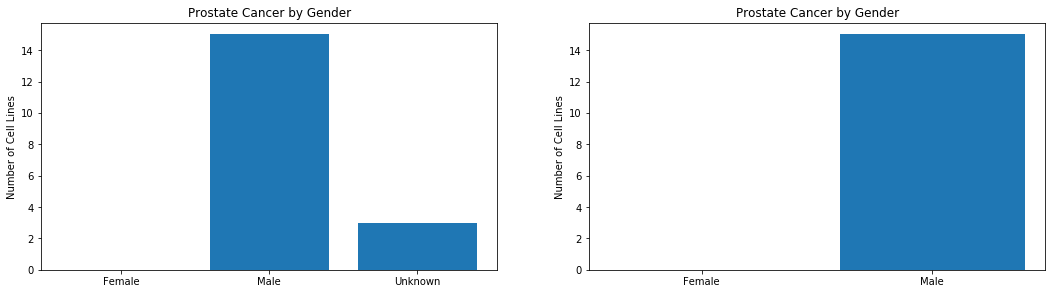

 
Female Counts =  99     0.2
Male Counts =  231     0.46
Unknown Counts =  168     0.34
Total =  498 (without unknowns: 330 )
 
Female Counts =  99     0.3
Male Counts =  231     0.7
Unknown Counts =  0     0.0
Total =  330 (without unknowns: 330 )


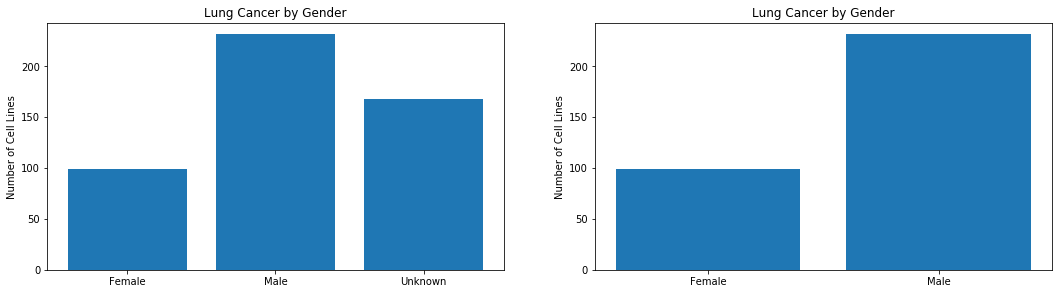

In [16]:
def parse_data_count_gender(source_filename, cancer_type, unknown_included):
    
    filename = os.path.join("Data", source_filename)
     
    # Define variables
    data = []; female = []; male = []; unknown =[]; 
    year_female = []; year_male = []; year_unknown =[]; 
    count_female = 0; count_male = 0; count_unknown=0; count_all = 0;
    
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()  
    
    for i in range(len(data)):
        x1,x2,x3,x4,x5,x6,x7 = data[i].split(",") 
        
        if x4 == '0':
            if cancer_type == "all":
                x1 = cancer_type
            
            if x1 == cancer_type: 
                
                if unknown_included == 'yes':
                    if x2 == '3':
                        count_unknown = count_unknown + 1
                        count_all = count_all+1
                
                if x2 == '1':
                    count_female = count_female + 1
                    count_all = count_all+1
        
                if x2 == '2':
                    count_male = count_male + 1
                    count_all = count_all+1
            

    total = [count_female, count_male, count_unknown]
    total_percentages = [count_female/count_all, count_male/count_all, count_unknown/count_all ]
    
    print(" ")
    print("Female Counts = ", count_female, '   ', round(count_female/count_all,2))
    print("Male Counts = ", count_male, '   ', round(count_male/count_all,2))
    print("Unknown Counts = ", count_unknown, '   ', round(count_unknown/count_all,2))
    print("Total = ", count_all,'(without unknowns:', count_all-count_unknown, ')')
    
    return(total, total_percentages)   

def parse_cell_line_counts_genders(source_filename, cancer_type, year_min, year_max, title):
    
    gender_list = ["Female","Male","Unknown"]
    
    fig = plt.figure(2, figsize=(18, 10)); 
    
    plot_number = 221; ax = fig.add_subplot(plot_number);
    total, total_percentages = parse_data_count_gender(source_filename, cancer_type, 'yes')
    plt.bar(gender_list,total)
    plt.title(title)
    plt.ylabel('Number of Cell Lines'); 
    # plt.legend(gender_list,loc='lower right')
    
    plot_number = 222; ax = fig.add_subplot(plot_number);
    total, total_percentages = parse_data_count_gender(source_filename, cancer_type, 'no')
    
    plt.bar(gender_list[0:2],total[0:2])
    plt.title(title)
    plt.ylabel('Number of Cell Lines'); 
    # plt.legend(gender_list[0:2],loc='lower right')
    
    saved_filename = os.path.join("Figures", title +'.jpg')
    plt.savefig(saved_filename, bbox_inches='tight')
    plt.show()
 

parse_cell_line_counts_genders("v01_CellLineSum_withoutLabels.csv", '2', 2001, 2018, 'Breast Cancer by Gender')
parse_cell_line_counts_genders("v01_CellLineSum_withoutLabels.csv", '3', 2001, 2018, 'Prostate Cancer by Gender')
parse_cell_line_counts_genders("v01_CellLineSum_withoutLabels.csv", '4', 2001, 2018, 'Lung Cancer by Gender')



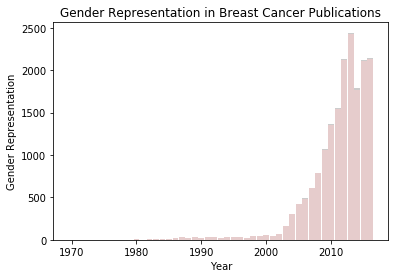

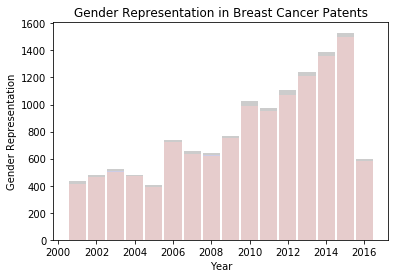

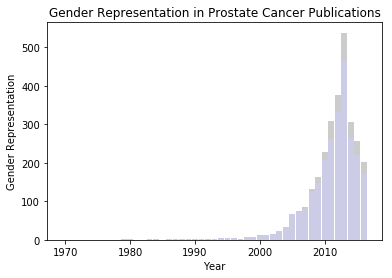

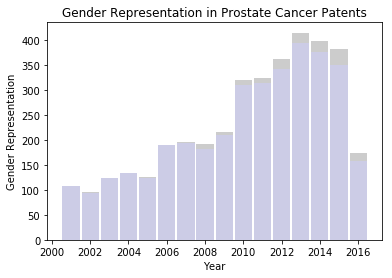

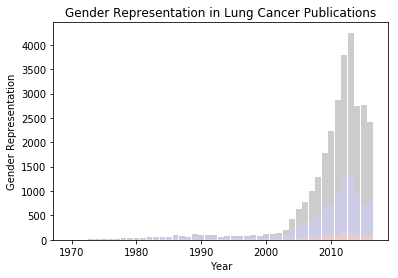

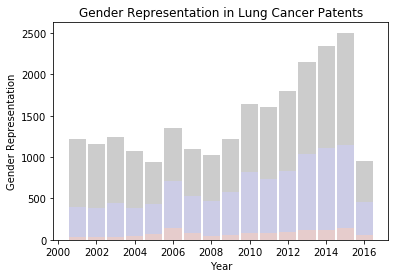

In [17]:
def parse_data_count_gender(file, cancer_type):
    
    filename = os.path.join("Data", file)
     
    # Defining variables
    data = [];  female = []; male = []; unknown = []; 
    year_female = []; year_male = []; year_unknown = []; 
    count_female = 0; count_male = 0; count_unknown = 0; 
    
    # Open and read the data from the file
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    # Find the first year in the dataset
    years=[];
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",")
        if i > 0:
            x4 = int(x4)
            years.append(x4);  
    
    # Create list of all years
    a = min(years); b = max(years); years = [];
    while a <= b:
        years.append(a) 
        a = a+1

    # Sort the data into lists for each gender
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        if x3 == cancer_type: 
            # Change the data read in as strings to int
            x1 = int(x1); x2 = int(x2); x4 = int(x4); x5 = int(x5);
            
            if x1 == 3:
                unknown.append(x5); year_unknown.append(x4); count_unknown = count_unknown + x5;
            if x1 == 1:
                female.append(x5); year_female.append(x4); count_female = count_female + x5;
            if x1 == 2:
                male.append(x5); year_male.append(int(x4)); count_male = count_male + x5;
        
        
    # Create empty list for each variable to fill in with values for each year. 
    all_year_female = [];
    for i in range(len(years)):
        all_year_female.append(0)
    
    all_year_male = [];
    for i in range(len(years)):
        all_year_male.append(0)
        
    all_year_unknown = [];
    for i in range(len(years)): 
        all_year_unknown.append(0)
    
    # List the counts for all possible years
    for i in range(len(year_female)):  
        for j in range(len(years)):
            if year_female[i] == years[j]:
                all_year_female[j] = all_year_female[j]+female[i]
    
    for i in range(len(year_male)):  
        for j in range(len(years)):
            if year_male[i] == years[j]:
                all_year_male[j] = all_year_male[j]+male[i]
                
    for i in range(len(year_unknown)):  
        for j in range(len(years)):
            if year_unknown[i] == years[j]:
                all_year_unknown[j] = all_year_unknown[j]+unknown[i]

    return(years, all_year_female, all_year_male, all_year_unknown)


def parse_counts_gender(source_filename, cancer_type, title):

    years, all_year_female, all_year_male, all_year_unknown = parse_data_count_gender(source_filename, cancer_type)
    
    plt.bar(years, all_year_female, color=[.9, .8, .8], width=.9)
    
    bar_offset = []
    for i in range(len(all_year_female)):
        number = all_year_female[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_male, color=[.8, .8, .9], width=.9, bottom = bar_offset ) 
    
    bar_offset = []
    for i in range(len(all_year_female)):
        number = all_year_female[i]+all_year_male[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_unknown, color=[.8, .8, .8], width=.9, bottom = bar_offset)

    plt.title(title)
    plt.xlabel('Year'); 
    plt.ylabel('Gender Representation'); 
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()


parse_counts_gender("v01_PuCo.csv", "2", "Gender Representation in Breast Cancer Publications")
parse_counts_gender("v01_PaCo.csv", "2", "Gender Representation in Breast Cancer Patents")

parse_counts_gender("v01_PuCo.csv", "3", "Gender Representation in Prostate Cancer Publications")
parse_counts_gender("v01_PaCo.csv", "3", "Gender Representation in Prostate Cancer Patents")

parse_counts_gender("v01_PuCo.csv", "4", "Gender Representation in Lung Cancer Publications")
parse_counts_gender("v01_PaCo.csv", "4", "Gender Representation in Lung Cancer Patents")


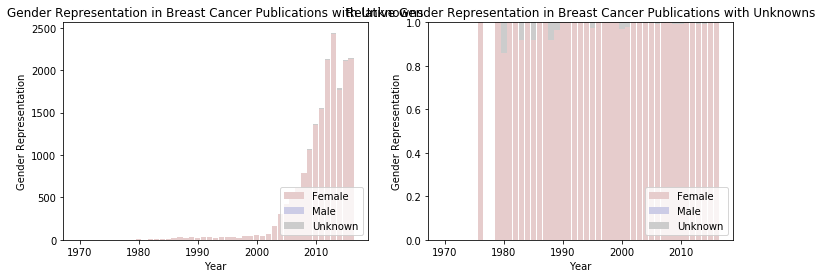

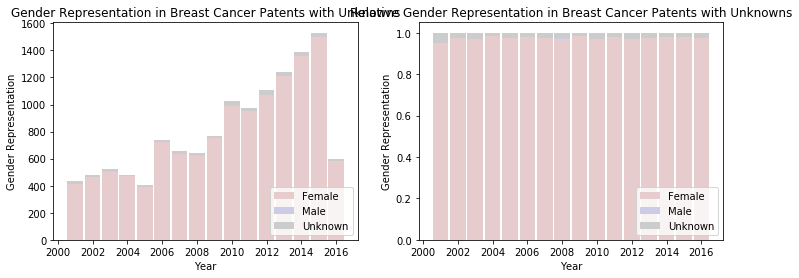

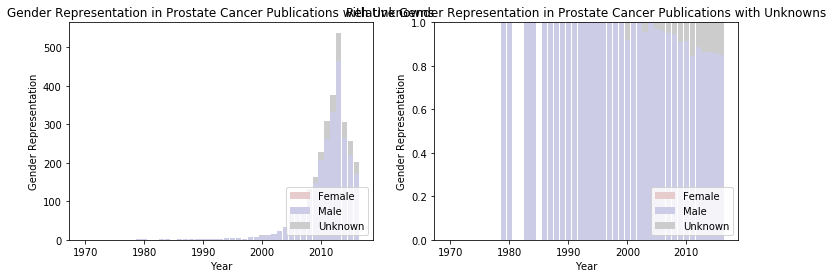

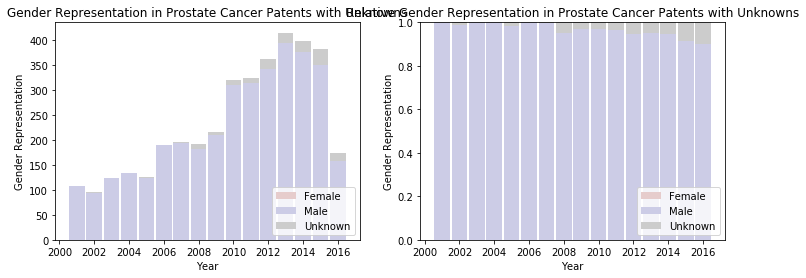

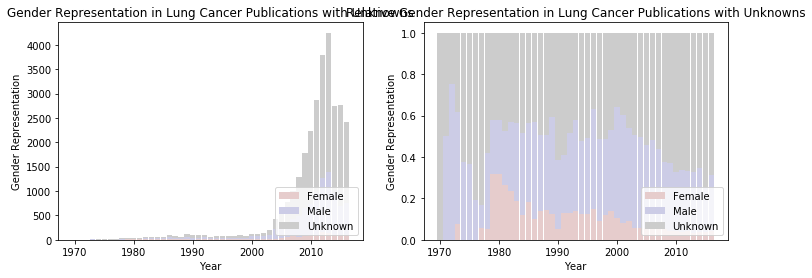

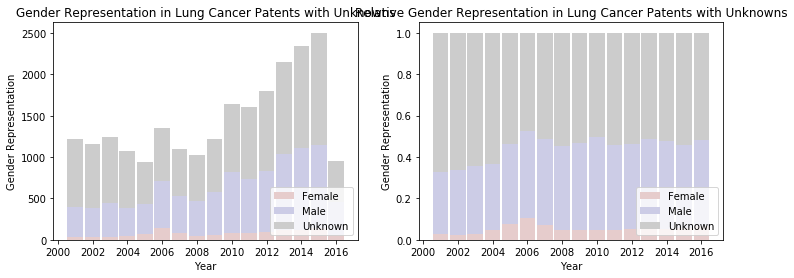

In [18]:
def parse_data_count_gender_percentage(file, cancer_type):
    
    filename = os.path.join("Data", file)
     
    # Defining variables
    data = [];  female = []; male = []; unknown = []; 
    year_female = []; year_male = []; year_unknown = []; 
    count_female = 0; count_male = 0; count_unknown = 0; 
    
    # Open and read the data from the file
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    # Find the first year in the dataset
    years=[];
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",")
        if i > 0:
            x4 = int(x4)
            years.append(x4);  
    
    # Create list of all years
    a = min(years); b = max(years); years = [];
    while a <= b:
        years.append(a) 
        a = a+1

    # Sort the data into lists for each gender
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        if x3 == cancer_type: 
            # Change the data read in as strings to int
            x1 = int(x1); x2 = int(x2); x4 = int(x4); x5 = int(x5);
            
            if x1 == 3:
                unknown.append(x5); year_unknown.append(x4); count_unknown = count_unknown + x5;
            if x1 == 1:
                female.append(x5); year_female.append(x4); count_female = count_female + x5;
            if x1 == 2:
                male.append(x5); year_male.append(int(x4)); count_male = count_male + x5;
        
        
    # Create empty list for each variable to fill in with values for each year. 
    all_year_female = []; all_year_female_percentage = [];
    for i in range(len(years)):
        all_year_female.append(0); all_year_female_percentage.append(0)
    
    all_year_male = []; all_year_male_percentage = [];
    for i in range(len(years)):
        all_year_male.append(0); all_year_male_percentage.append(0);
        
    all_year_unknown = []; all_year_unknown_percentage = [];
    for i in range(len(years)): 
        all_year_unknown.append(0); all_year_unknown_percentage.append(0);
    
    # List the counts for all possible years
    for i in range(len(year_female)):  
        for j in range(len(years)):
            if year_female[i] == years[j]:
                all_year_female[j] = all_year_female[j]+female[i]
    
    for i in range(len(year_male)):  
        for j in range(len(years)):
            if year_male[i] == years[j]:
                all_year_male[j] = all_year_male[j]+male[i]
                
    for i in range(len(year_unknown)):  
        for j in range(len(years)):
            if year_unknown[i] == years[j]:
                all_year_unknown[j] = all_year_unknown[j]+unknown[i]
                
    # Find percentages for each group for each year
    for i in range(len(all_year_female_percentage)):
        sum = all_year_female[i] + all_year_male[i] + all_year_unknown[i];
        if sum > 0:
            all_year_female_percentage[i] = all_year_female[i]/sum
            all_year_male_percentage[i] = all_year_male[i]/sum
            all_year_unknown_percentage[i] = all_year_unknown[i]/sum 
    
    return(years, all_year_female, all_year_male, all_year_unknown, all_year_female_percentage, all_year_male_percentage, all_year_unknown_percentage)


def parse_counts_gender_percentage(source_filename, cancer_type, title):
    
    genders = ['Female', 'Male', 'Unknown']

    # Retrieve data from files
    years, all_year_female, all_year_male, all_year_unknown, \
    all_year_female_percentage, all_year_male_percentage, all_year_unknown_percentage \
    = parse_data_count_gender_percentage(source_filename, cancer_type)
    
    # Specify the figure
    box_size = 4; fig = plt.figure(1.5, figsize=(3*box_size, 1*box_size)); plot_number = 120;
    
    # Plot of total counts 
    plot_number = plot_number+1; ax = fig.add_subplot(plot_number);
    plt.bar(years, all_year_female, color=[.9, .8, .8], width=.9)
    
    bar_offset = []
    for i in range(len(all_year_female)):
        number = all_year_female[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_male, color=[.8, .8, .9], width=.9, bottom = bar_offset ) 
    
    bar_offset = []
    for i in range(len(all_year_female)):
        number = all_year_female[i] + all_year_male[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_unknown, color=[.8, .8, .8], width=.9, bottom = bar_offset)

    plt.title(title);
    plt.legend(genders,loc='lower right')
    plt.xlabel('Year'); 
    plt.ylabel('Gender Representation'); 
    
    # Plot of total counts 
    plot_number = plot_number+1; ax = fig.add_subplot(plot_number);
    plt.bar(years, all_year_female_percentage, color=[.9, .8, .8], width=.9)
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_male_percentage, color=[.8, .8, .9], width=.9, bottom = bar_offset ) 
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i] + all_year_male_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_unknown_percentage, color=[.8, .8, .8], width=.9, bottom = bar_offset)

    plt.title('Relative ' + title);
    plt.legend(genders,loc='lower right')
    plt.xlabel('Year'); 
    plt.ylabel('Gender Representation'); 
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()


parse_counts_gender_percentage("v01_PuCo.csv", "2", "Gender Representation in Breast Cancer Publications with Unknowns")
parse_counts_gender_percentage("v01_PaCo.csv", "2", "Gender Representation in Breast Cancer Patents with Unknowns")

parse_counts_gender_percentage("v01_PuCo.csv", "3", "Gender Representation in Prostate Cancer Publications with Unknowns")
parse_counts_gender_percentage("v01_PaCo.csv", "3", "Gender Representation in Prostate Cancer Patents with Unknowns")

parse_counts_gender_percentage("v01_PuCo.csv", "4", "Gender Representation in Lung Cancer Publications with Unknowns")
parse_counts_gender_percentage("v01_PaCo.csv", "4", "Gender Representation in Lung Cancer Patents with Unknowns")


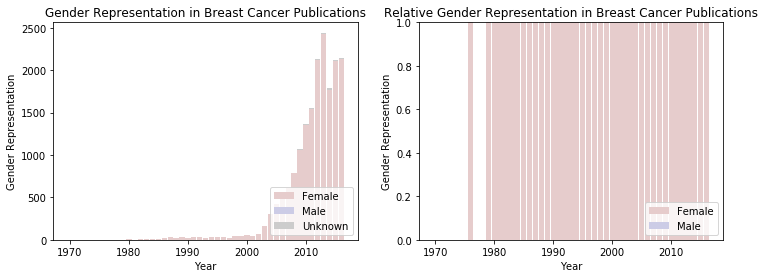

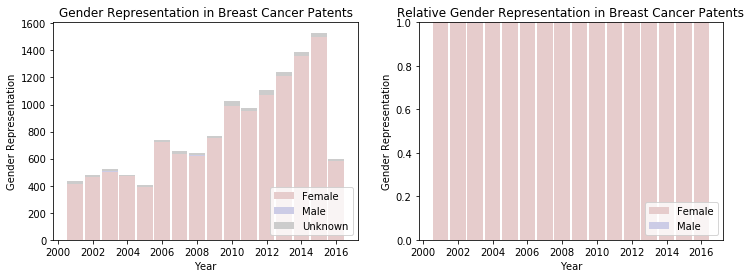

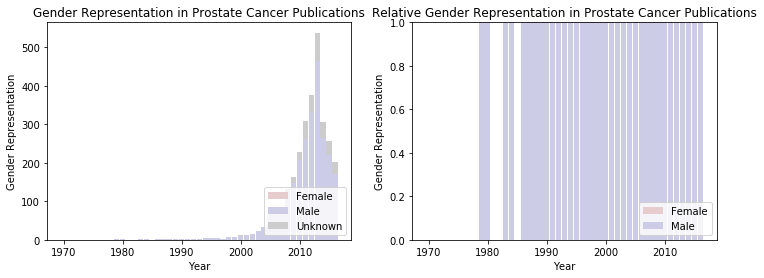

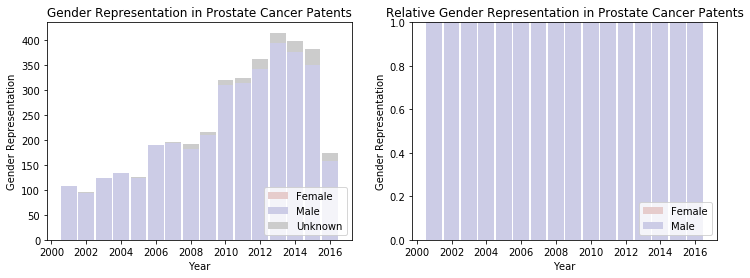

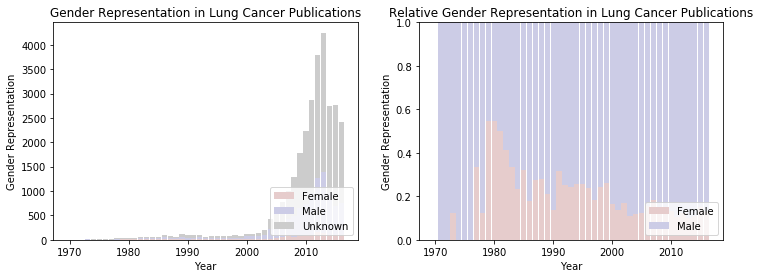

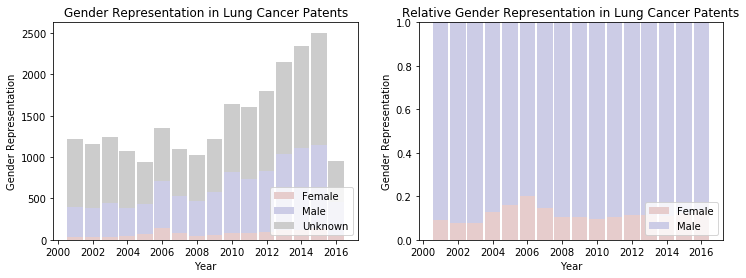

In [19]:
def parse_data_count_gender_percentage(file, cancer_type):
    
    filename = os.path.join("Data", file)
     
    # Defining variables
    data = [];  female = []; male = []; unknown = []; 
    year_female = []; year_male = []; year_unknown = []; 
    count_female = 0; count_male = 0; count_unknown = 0; 
    
    # Open and read the data from the file
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    # Find the first year in the dataset
    years=[];
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",")
        if i > 0:
            x4 = int(x4)
            years.append(x4);  
    
    # Create list of all years
    a = min(years); b = max(years); years = [];
    while a <= b:
        years.append(a) 
        a = a+1

    # Sort the data into lists for each gender
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        if x3 == cancer_type: 
            # Change the data read in as strings to int
            x1 = int(x1); x2 = int(x2); x4 = int(x4); x5 = int(x5);
            
            if x1 == 3:
                unknown.append(x5); year_unknown.append(x4); count_unknown = count_unknown + x5;
            if x1 == 1:
                female.append(x5); year_female.append(x4); count_female = count_female + x5;
            if x1 == 2:
                male.append(x5); year_male.append(int(x4)); count_male = count_male + x5;
        
        
    # Create empty list for each variable to fill in with values for each year. 
    all_year_female = []; all_year_female_percentage = [];
    for i in range(len(years)):
        all_year_female.append(0); all_year_female_percentage.append(0)
    
    all_year_male = []; all_year_male_percentage = [];
    for i in range(len(years)):
        all_year_male.append(0); all_year_male_percentage.append(0);
        
    all_year_unknown = []; all_year_unknown_percentage = [];
    for i in range(len(years)): 
        all_year_unknown.append(0); all_year_unknown_percentage.append(0);
    
    # List the counts for all possible years
    for i in range(len(year_female)):  
        for j in range(len(years)):
            if year_female[i] == years[j]:
                all_year_female[j] = all_year_female[j]+female[i]
    
    for i in range(len(year_male)):  
        for j in range(len(years)):
            if year_male[i] == years[j]:
                all_year_male[j] = all_year_male[j]+male[i]
                
    for i in range(len(year_unknown)):  
        for j in range(len(years)):
            if year_unknown[i] == years[j]:
                all_year_unknown[j] = all_year_unknown[j]+unknown[i]
                
    # Find percentages for each group for each year
    for i in range(len(all_year_female_percentage)):
        sum = all_year_female[i] + all_year_male[i];
        if sum > 0:
            all_year_female_percentage[i] = all_year_female[i]/sum
            all_year_male_percentage[i] = all_year_male[i]/sum
    
    return(years, all_year_female, all_year_male, all_year_unknown, all_year_female_percentage, all_year_male_percentage, all_year_unknown_percentage)


def parse_counts_gender_percentage(source_filename, cancer_type, title):
    
    genders = ['Female', 'Male', 'Unknown']

    # Retrieve data from files
    years, all_year_female, all_year_male, all_year_unknown, \
    all_year_female_percentage, all_year_male_percentage, all_year_unknown_percentage \
    = parse_data_count_gender_percentage(source_filename, cancer_type)
    
    # Specify the figure
    box_size = 4; fig = plt.figure(1.5, figsize=(3*box_size, 1*box_size)); plot_number = 120;
    
    # Plot of total counts 
    plot_number = plot_number+1; ax = fig.add_subplot(plot_number);
    plt.bar(years, all_year_female, color=[.9, .8, .8], width=.9)
    
    bar_offset = []
    for i in range(len(all_year_female)):
        number = all_year_female[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_male, color=[.8, .8, .9], width=.9, bottom = bar_offset ) 
    
    bar_offset = []
    for i in range(len(all_year_female)):
        number = all_year_female[i] + all_year_male[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_unknown, color=[.8, .8, .8], width=.9, bottom = bar_offset)

    plt.title(title);
    plt.legend(genders,loc='lower right')
    plt.xlabel('Year'); 
    plt.ylabel('Gender Representation'); 
    
    # Plot of total counts 
    plot_number = plot_number+1; ax = fig.add_subplot(plot_number);
    plt.bar(years, all_year_female_percentage, color=[.9, .8, .8], width=.9)
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_male_percentage, color=[.8, .8, .9], width=.9, bottom = bar_offset ) 
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i] + all_year_male_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_unknown_percentage, color=[.8, .8, .8], width=.9, bottom = bar_offset)

    plt.title('Relative ' + title);
    plt.legend(genders[0:2],loc='lower right')
    plt.xlabel('Year'); 
    plt.ylabel('Gender Representation'); 
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()


parse_counts_gender_percentage("v01_PuCo.csv", "2", "Gender Representation in Breast Cancer Publications")
parse_counts_gender_percentage("v01_PaCo.csv", "2", "Gender Representation in Breast Cancer Patents")

parse_counts_gender_percentage("v01_PuCo.csv", "3", "Gender Representation in Prostate Cancer Publications")
parse_counts_gender_percentage("v01_PaCo.csv", "3", "Gender Representation in Prostate Cancer Patents")

parse_counts_gender_percentage("v01_PuCo.csv", "4", "Gender Representation in Lung Cancer Publications")
parse_counts_gender_percentage("v01_PaCo.csv", "4", "Gender Representation in Lung Cancer Patents")


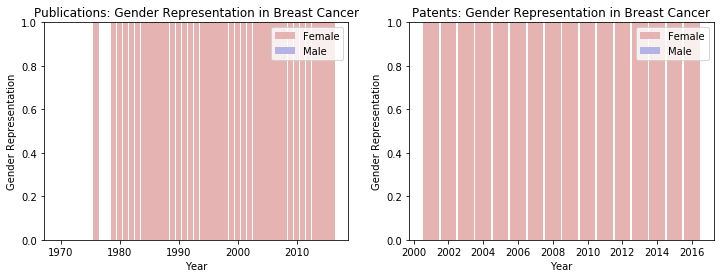

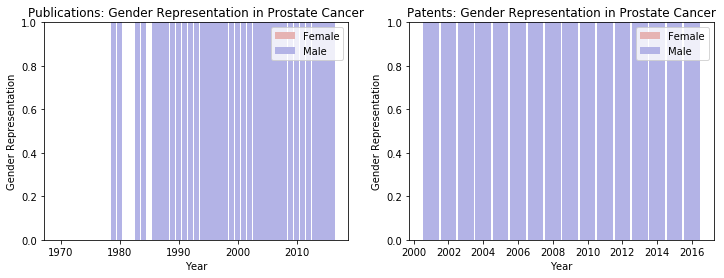

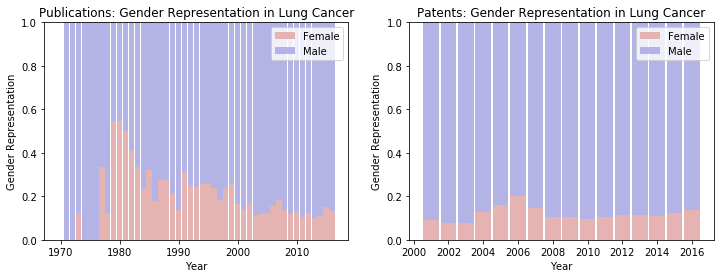

In [20]:
def parse_data_count_gender_percentage(file, cancer_type):
    
    filename = os.path.join("Data", file)
     
    # Defining variables
    data = [];  female = []; male = []; unknown = []; 
    year_female = []; year_male = []; year_unknown = []; 
    count_female = 0; count_male = 0; count_unknown = 0; 
    
    # Open and read the data from the file
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    # Find the first year in the dataset
    years=[];
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",")
        if i > 0:
            x4 = int(x4)
            years.append(x4);  
    
    # Create list of all years
    a = min(years); b = max(years); years = [];
    while a <= b:
        years.append(a) 
        a = a+1

    # Sort the data into lists for each gender
    for i in range(len(data)):
        x1,x2,x3,x4,x5 = data[i].split(",") 
        
        if x3 == cancer_type: 
            # Change the data read in as strings to int
            x1 = int(x1); x2 = int(x2); x4 = int(x4); x5 = int(x5);
            
            if x1 == 3:
                unknown.append(x5); year_unknown.append(x4); count_unknown = count_unknown + x5;
            if x1 == 1:
                female.append(x5); year_female.append(x4); count_female = count_female + x5;
            if x1 == 2:
                male.append(x5); year_male.append(int(x4)); count_male = count_male + x5;
        
        
    # Create empty list for each variable to fill in with values for each year. 
    all_year_female = []; all_year_female_percentage = [];
    for i in range(len(years)):
        all_year_female.append(0); all_year_female_percentage.append(0)
    
    all_year_male = []; all_year_male_percentage = [];
    for i in range(len(years)):
        all_year_male.append(0); all_year_male_percentage.append(0);
        
    all_year_unknown = []; all_year_unknown_percentage = [];
    for i in range(len(years)): 
        all_year_unknown.append(0); all_year_unknown_percentage.append(0);
    
    # List the counts for all possible years
    for i in range(len(year_female)):  
        for j in range(len(years)):
            if year_female[i] == years[j]:
                all_year_female[j] = all_year_female[j]+female[i]
    
    for i in range(len(year_male)):  
        for j in range(len(years)):
            if year_male[i] == years[j]:
                all_year_male[j] = all_year_male[j]+male[i]
                
    for i in range(len(year_unknown)):  
        for j in range(len(years)):
            if year_unknown[i] == years[j]:
                all_year_unknown[j] = all_year_unknown[j]+unknown[i]
                
    # Find percentages for each group for each year
    for i in range(len(all_year_female_percentage)):
        sum = all_year_female[i] + all_year_male[i];
        if sum > 0:
            all_year_female_percentage[i] = all_year_female[i]/sum
            all_year_male_percentage[i] = all_year_male[i]/sum
    
    return(years, all_year_female, all_year_male, all_year_unknown, all_year_female_percentage, all_year_male_percentage, all_year_unknown_percentage)


def parse_counts_gender_percentage_compare(source_filename1, source_filename2, cancer_type, title):
    
    genders = ['Female', 'Male', 'Unknown']

    # Specify the figure
    box_size = 4; fig = plt.figure(1.5, figsize=(3*box_size, 1*box_size)); plot_number = 120;
    
    # Retrieve data from files
    years, all_year_female, all_year_male, all_year_unknown, \
    all_year_female_percentage, all_year_male_percentage, all_year_unknown_percentage \
    = parse_data_count_gender_percentage(source_filename1, cancer_type)
    
    # Plot of total counts 
    plot_number = plot_number+1; ax = fig.add_subplot(plot_number);
    plt.bar(years, all_year_female_percentage, color=[.9, .7, .7], width=.9)
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_male_percentage, color=[.7, .7, .9], width=.9, bottom = bar_offset ) 
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i] + all_year_male_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_unknown_percentage, color=[.8, .8, .8], width=.9, bottom = bar_offset)

    plt.title('Publications: ' + title);
    plt.legend(genders[0:2],loc='upper right')
    plt.xlabel('Year'); 
    plt.ylabel('Gender Representation'); 
    
    # Retrieve data from files
    years, all_year_female, all_year_male, all_year_unknown, \
    all_year_female_percentage, all_year_male_percentage, all_year_unknown_percentage \
    = parse_data_count_gender_percentage(source_filename2, cancer_type)
    
    # Plot of total counts 
    plot_number = plot_number+1; ax = fig.add_subplot(plot_number);
    plt.bar(years, all_year_female_percentage, color=[.9, .7, .7], width=.9)
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_male_percentage, color=[.7, .7, .9], width=.9, bottom = bar_offset ) 
    
    bar_offset = []
    for i in range(len(all_year_female_percentage)):
        number = all_year_female_percentage[i] + all_year_male_percentage[i]
        bar_offset.append(number)
    
    plt.bar(years, all_year_unknown_percentage, color=[.8, .8, .8], width=.9, bottom = bar_offset)

    plt.title('Patents: ' + title);
    plt.legend(genders[0:2],loc='upper right')
    plt.xlabel('Year'); 
    plt.ylabel('Gender Representation'); 
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()

# Compare patents and publications for gender representation
parse_counts_gender_percentage_compare("v01_PuCo.csv", "v01_PaCo.csv", "2", "Gender Representation in Breast Cancer")
parse_counts_gender_percentage_compare("v01_PuCo.csv", "v01_PaCo.csv", "3", "Gender Representation in Prostate Cancer")
parse_counts_gender_percentage_compare("v01_PuCo.csv", "v01_PaCo.csv", "4", "Gender Representation in Lung Cancer")

